# Setup

## Look around

In [397]:
%ls

colab_extended_GPflow_pipeline.ipynb
colab_extended_grid_search_pipeline.ipynb
colab_reproducing_ci_gp.ipynb
colab_reproducing_ci_rf.ipynb
colab_reproducing_grid_search_pipeline.ipynb
eda.ipynb
visualise_extended_grid_search_results.ipynb
visualise_reproducing_grid_search_results.ipynb


In [398]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

## Import Modules

### Standard imports

In [3]:
import json
import pickle

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Custom imports

In [4]:
sys.path.insert(0, '..')

# plotting
from util_scripts.plotting_functions_and_vars import FIGSIZE_CI, FIGSIZE_HEATMAP, PLOTS_DIR
from util_scripts.plotting_functions_and_vars import datasets_to_titles, datasets_to_units, metrics_to_labels
from util_scripts.plotting_functions_and_vars import plot_algorithm_dataset_comparison_heatmap

sys.path.insert(0, './notebooks')

## CHOOSE dataset, smile_type, grid_search_type to visualize

In [399]:
# root = '../backup_results'
root = '../results'

In [480]:
dataset = 'freesolv'
assert dataset in ['freesolv', 'esol', 'lipophilicity']

smile_type = 'original'
assert smile_type in ['original', 'protonated']

grid_search_type = 'extended'
assert grid_search_type in ['reproducing', 'extended']

# correlated features treatment
if dataset == 'esol':
    cf = 'reduced'
else:
    cf = 'full'
assert cf in ['reduced', 'full']

## Titles, Units and Labels for datasets

In [481]:
for key, value in datasets_to_titles.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  Solvation Energy
esol          :  Log Solubility
lipophilicity :  Octanol/Water Distribution Coefficient


In [482]:
for key, value in datasets_to_units.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

freesolv      :  (kcal/mol)
esol          :  (mol/litre)
lipophilicity :  (logD)


In [483]:
for key, value in metrics_to_labels.items():
    print(key, (13 - len(key))*' ' + ': ',  value)

RMSE          :  root-mean-square error
MAE           :  mean absolute error
R^2           :  R^2 (coefficient of determination)
pearson_r     :  Pearson correlation


## CHOOSE metric to display

In [484]:
metric = 'RMSE'
assert metric in metrics_to_labels

In [485]:
if metric in ['RMSE', 'MAE']:
    pass
else:
    # no units
    datasets_to_units = {'freesolv': '', 'esol': '', 'lipophilicity': ''}

## Load everything

In [486]:
%ls ../results/

esol_original_extended_gp_tanimoto_train_test_scores.pickle
esol_original_extended_gp_tanimoto_val_scores.pickle
esol_original_extended_random_search_best_params_full.pickle
esol_original_extended_random_search_best_params_reduced.pickle
esol_original_extended_random_search_best_train_test_scores_full.pickle
esol_original_extended_random_search_best_train_test_scores_reduced.pickle
esol_original_extended_random_search_best_val_scores_full.pickle
esol_original_extended_random_search_best_val_scores_reduced.pickle
esol_original_extended_random_search_grid_params_reduced.pickle
esol_original_reproducing_random_search_best_params.pickle
esol_original_reproducing_random_search_best_train_test_scores.pickle
esol_original_reproducing_random_search_best_val_scores.pickle
esol_original_reproducing_random_search_grid_params.pickle
freesolv_original_extended_gp_tanimoto_train_test_scores.pickle
freesolv_original_extended_gp_tanimoto_val_scores.pickle
freesolv_original_extended_random_search_best_

### Sklearn

In [487]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_val_scores_{cf}.pickle', 'rb') as fp:
    val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_train_test_scores_{cf}.pickle', 'rb') as fp:
    train_test_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_best_params_{cf}.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_random_search_grid_params_{cf}.pickle', 'rb') as fp:
    params = pickle.load(fp)

In [488]:
# best_params

Have a look at best parameters.

In [489]:
best_params['1024ecfp-4']

{'rf': {'rf__n_estimators': 1000, 'rf__max_features': 0.8},
 'xgb': {'xgb__subsample': 0.5,
  'xgb__n_estimators': 200,
  'xgb__max_depth': 3,
  'xgb__learning_rate': 0.3},
 'krr': {'krr__alpha': 0.001},
 'gp': {'gp__kernel': Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)}}

Have a look at the scores

In [490]:
# val_scores

In [491]:
# train_test_scores

### GPflow

In [492]:
with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_gp_tanimoto_val_scores.pickle', 'rb') as fp:
    gpflow_val_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_{grid_search_type}_gp_tanimoto_train_test_scores.pickle', 'rb') as fp:
    gpflow_train_test_scores = pickle.load(fp)

In [493]:
# gpflow_val_scores

### Get means and standard deviations

#### Scikit-Learn

Get the means over folds (`cross_validate()` records the results as arrays even for `num_folds=1`)

In [494]:
scores = val_scores
mean_val_scores = {features: {model: {record: np.abs(scores[features][model][record].mean()) for record in scores[features][model]} for model in scores[features]} for features in scores}
std_val_scores = {features: {model: {record: scores[features][model][record].std() for record in scores[features][model]} for model in scores[features]} for features in scores}

# mean_val_scores
# std_val_scores

In [495]:
scores = train_test_scores
mean_train_test_scores = {features: {model: {record: np.abs(scores[features][model][record].mean()) for record in scores[features][model]} for model in scores[features]} for features in scores}
std_train_test_scores = {features: {model: {record: scores[features][model][record].std() for record in scores[features][model]} for model in scores[features]} for features in scores}

# mean_train_test_scores
# std_train_test_scores

#### GPflow

In [496]:
scores = gpflow_val_scores
gpflow_mean_val_scores = {features: {record: np.abs(scores[features][record]).mean() for record in scores[features]} for features in scores}
gpflow_std_val_scores = {features: {record: np.array(scores[features][record]).std() for record in scores[features]} for features in scores}

# gpflow_mean_val_scores
# gpflow_std_val_scores

In [497]:
scores = gpflow_train_test_scores
gpflow_mean_train_test_scores = {features: {record: np.abs(scores[features][record]).mean() for record in scores[features]} for features in scores}
gpflow_std_train_test_scores = {features: {record: np.array(scores[features][record]).std() for record in scores[features]} for features in scores}

# gpflow_mean_train_test_scores
# gpflow_std_train_test_scores

# Visualization

## Plotting options

In [498]:
mean_val_scores.keys()

dict_keys(['RDKit', '1024ecfp-4', '1024ecfp-6', '2048ecfp-4', '2048ecfp-6', '1024ecfp-4 + RDKit', '1024ecfp-6 + RDKit', '2048ecfp-4 + RDKit', '2048ecfp-6 + RDKit'])

In [499]:
column_order = ['RDKit',
                '1024ecfp-4', '1024ecfp-4 + RDKit',
                '1024ecfp-6', '1024ecfp-6 + RDKit',
                '2048ecfp-4', '2048ecfp-4 + RDKit',
                '2048ecfp-6', '2048ecfp-6 + RDKit'
                ]

row_order = ['Random Forest', 'XGBoost', 'Kernel Ridge', 'GP-sklearn', 'GP-GPflow']
mapper = {
    'rf': 'Random Forest',
    'xgb': 'XGBoost',
    'krr': 'Kernel Ridge',
    'gp': 'GP-sklearn',
    'gpflow': 'GP-GPflow'
}

## Train metric

In [500]:
## pull out train scores for all features for all models (train set is the train set when working on train/test split )
train_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'train_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
train_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.44,0.74,0.77,0.75,0.76,0.43,0.44,0.44,0.44
xgb,0.27,0.67,0.68,0.14,1.04,0.12,0.12,0.11,0.12
krr,0.12,0.05,0.10,0.08,0.07,0.02,0.02,0.02,0.02
gp,1.05,3.32,0.02,0.09,0.02,0.03,0.02,0.03,0.02


In [501]:
gpflow_train_metric = {features: {'gpflow': gpflow_mean_train_test_scores[features][f'train_{metric}']} for features in gpflow_mean_train_test_scores}
for features in train_metric:
    if features not in gpflow_train_metric:
        gpflow_train_metric[features] = {}
        gpflow_train_metric[features]['gpflow'] = None
gpflow_train_metric = pd.DataFrame(gpflow_train_metric)[train_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_train_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,0.05,0.02,0.05,0.02,None,None,None,None


In [502]:
combined_train_metric = pd.concat([train_metric, gpflow_train_metric])
combined_train_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.44,0.74,0.77,0.75,0.76,0.43,0.44,0.44,0.44
xgb,0.27,0.67,0.68,0.14,1.04,0.12,0.12,0.11,0.12
krr,0.12,0.05,0.10,0.08,0.07,0.02,0.02,0.02,0.02
gp,1.05,3.32,0.02,0.09,0.02,0.03,0.02,0.03,0.02
gpflow,NaN,0.05,0.02,0.05,0.02,NaN,NaN,NaN,NaN


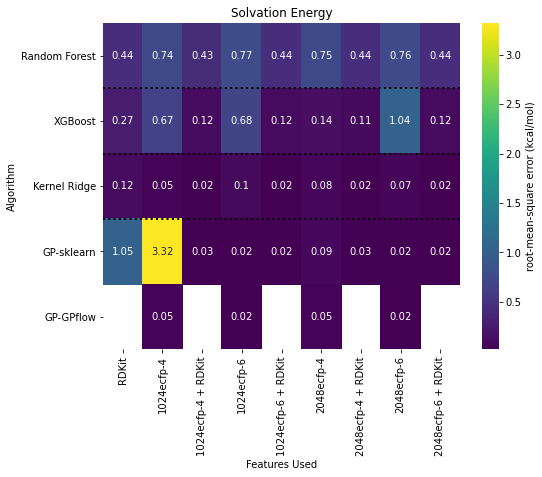

In [503]:
df = combined_train_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

## Val metric

### Scikit-Learn

In [504]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_metric = pd.DataFrame({features: {model: mean_val_scores[features][model][f'test_{metric}'] for model in mean_val_scores[features]} for features in mean_val_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
val_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.32,2.39,2.47,2.40,2.48,1.41,1.41,1.36,1.41
xgb,1.02,2.12,2.21,1.81,2.27,1.13,1.19,1.14,1.17
krr,1.88,3.92,4.17,3.79,4.13,3.36,3.61,3.22,3.60
gp,1.60,3.70,3.24,2.73,2.76,2.66,1.42,2.60,1.30


### GPflow

In [505]:
gpflow_val_metric = {features: {'gpflow': gpflow_mean_val_scores[features][f'test_{metric}']} for features in gpflow_mean_val_scores}
for features in val_metric:
    if features not in gpflow_val_metric:
        gpflow_val_metric[features] = {}
        gpflow_val_metric[features]['gpflow'] = None
gpflow_val_metric = pd.DataFrame(gpflow_val_metric)[val_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_val_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,1.82,1.94,1.76,1.86,None,None,None,None


### Combined

In [506]:
combined_val_metric = pd.concat([val_metric, gpflow_val_metric])
combined_val_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.32,2.39,2.47,2.40,2.48,1.41,1.41,1.36,1.41
xgb,1.02,2.12,2.21,1.81,2.27,1.13,1.19,1.14,1.17
krr,1.88,3.92,4.17,3.79,4.13,3.36,3.61,3.22,3.60
gp,1.60,3.70,3.24,2.73,2.76,2.66,1.42,2.60,1.30
gpflow,NaN,1.82,1.94,1.76,1.86,NaN,NaN,NaN,NaN


### Heatmap

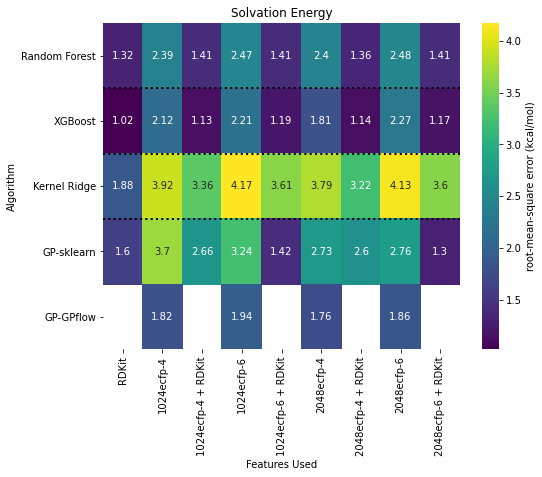

In [507]:
df = combined_val_metric
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

In [508]:
combined_val_metric

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.318468,2.388300,2.471258,2.399716,2.482164,1.409335,1.411271,1.360595,1.408385
xgb,1.019750,2.121608,2.211659,1.811312,2.270843,1.134740,1.194041,1.137866,1.168250
krr,1.880828,3.923582,4.172590,3.794209,4.133178,3.362130,3.613947,3.217046,3.599431
gp,1.602419,3.702557,3.235235,2.726548,2.757538,2.658689,1.424402,2.596580,1.303139
gpflow,NaN,1.815378,1.943833,1.757358,1.862905,NaN,NaN,NaN,NaN


### Scikit-Learn best

In [509]:
best = []
for model in val_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(val_metric.loc[model, val_metric.loc[model] == val_metric.loc[model].min()].index)[0]
    best.append([model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}']])
    print(model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}'])
    print()

xgb RDKit 1.0197499396886374 0.14643975559197284

gp 2048ecfp-6 + RDKit 1.3031390835658205 0.05476284898469423

rf RDKit 1.318467606379582 0.21778253843920686

krr RDKit 1.880827564898648 0.21450324002086973



In [510]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,RDKit,1.019750,0.146440
1,gp,2048ecfp-6 + RDKit,1.303139,0.054763
2,rf,RDKit,1.318468,0.217783
3,krr,RDKit,1.880828,0.214503


In [511]:
dataset

'freesolv'

### Combined

In [514]:
best = []
for model in combined_val_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(combined_val_metric.loc[model, combined_val_metric.loc[model] == combined_val_metric.loc[model].min()].index)[0]
    
    if model != 'gpflow':
        best.append([model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}']])
        print(model, features, mean_val_scores[features][model][f'test_{metric}'], std_val_scores[features][model][f'test_{metric}'])
    else:
        pass
        best.append([model, features, gpflow_mean_val_scores[features][f'test_{metric}'], gpflow_std_val_scores[features][f'test_{metric}']])
        print(model, features, gpflow_mean_val_scores[features][f'test_{metric}'], gpflow_std_val_scores[features][f'test_{metric}'])
    print()

xgb RDKit 1.0197499396886374 0.14643975559197284

gp 2048ecfp-6 + RDKit 1.3031390835658205 0.05476284898469423

rf RDKit 1.318467606379582 0.21778253843920686

gpflow 2048ecfp-4 1.7573584553531052 0.5795976250391914

krr RDKit 1.880827564898648 0.21450324002086973



In [527]:
dataset, smile_type, grid_search_type, cf

('freesolv', 'original', 'extended', 'full')

In [528]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,RDKit,0.919144,0.194983
1,rf,RDKit,1.119663,0.116559
2,gp,1024ecfp-6 + RDKit,1.277199,0.162655
3,krr,RDKit,1.903378,0.347493
4,gpflow,2048ecfp-4,2.022483,0.272678


## Test metric

### Scikit-Learn

In [529]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_metric = pd.DataFrame({features: {model: mean_train_test_scores[features][model][f'test_{metric}'] for model in mean_train_test_scores[features]} for features in mean_train_test_scores})

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
test_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.12,2.38,2.39,2.40,2.39,1.16,1.18,1.17,1.17
xgb,0.92,2.08,2.04,1.89,2.16,0.97,1.08,1.07,1.12
krr,1.90,3.35,3.90,3.22,3.90,2.63,3.29,2.38,3.31
gp,1.59,3.85,3.30,2.55,2.34,2.13,1.28,1.94,1.35


### GPflow

In [530]:
gpflow_test_metric = {features: {'gpflow': gpflow_mean_train_test_scores[features][f'test_{metric}']} for features in gpflow_mean_train_test_scores}
for features in test_metric:
    if features not in gpflow_test_metric:
        gpflow_test_metric[features] = {}
        gpflow_test_metric[features]['gpflow'] = None
gpflow_test_metric = pd.DataFrame(gpflow_test_metric)[test_metric.columns]

print(metric, ':',metrics_to_labels[metric], ', unit:', datasets_to_units[dataset])
gpflow_test_metric.round(2)

RMSE : root-mean-square error , unit: (kcal/mol)


,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
gpflow,None,2.06,2.18,2.02,2.13,None,None,None,None


### Combined

In [531]:
combined_test_metric = pd.concat([test_metric, gpflow_test_metric])
combined_test_metric.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.12,2.38,2.39,2.40,2.39,1.16,1.18,1.17,1.17
xgb,0.92,2.08,2.04,1.89,2.16,0.97,1.08,1.07,1.12
krr,1.90,3.35,3.90,3.22,3.90,2.63,3.29,2.38,3.31
gp,1.59,3.85,3.30,2.55,2.34,2.13,1.28,1.94,1.35
gpflow,NaN,2.06,2.18,2.02,2.13,NaN,NaN,NaN,NaN


### Heatmap

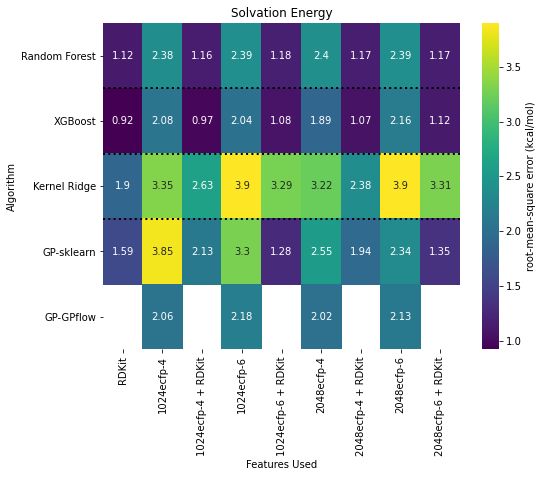

In [532]:
df = combined_test_metric.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

plot_algorithm_dataset_comparison_heatmap(df, dataset=dataset, metric=metric)

# fig.savefig(f'{PLOTS_DIR}/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')
plt.show()

In [533]:
combined_test_metric

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.119663,2.384055,2.393512,2.399871,2.393578,1.155087,1.183817,1.167815,1.174998
xgb,0.919144,2.081193,2.043461,1.894925,2.161108,0.965062,1.076466,1.074082,1.121155
krr,1.903378,3.347656,3.900644,3.221569,3.902393,2.627741,3.290779,2.380338,3.310282
gp,1.585225,3.852336,3.299073,2.553735,2.343223,2.127922,1.277199,1.940991,1.351948
gpflow,NaN,2.064607,2.182774,2.022483,2.126875,NaN,NaN,NaN,NaN


## Best feature set for each model

### Scikit-Learn

In [534]:
best = []
for model in test_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(test_metric.loc[model, test_metric.loc[model] == test_metric.loc[model].min()].index)[0]
    best.append([model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}']])
    print(model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}'])
    print()

xgb RDKit 0.9191437566741985 0.19498280738151097

rf RDKit 1.1196631080934496 0.11655862773197274

gp 1024ecfp-6 + RDKit 1.2771985552000977 0.1626546119438704

krr RDKit 1.9033775061765021 0.3474933671604229



In [535]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,RDKit,0.919144,0.194983
1,rf,RDKit,1.119663,0.116559
2,gp,1024ecfp-6 + RDKit,1.277199,0.162655
3,krr,RDKit,1.903378,0.347493


### Combined best

In [538]:
best = []
for model in combined_test_metric.min(axis=1).sort_values().index:
    # get the feature set for which 
    features = list(combined_test_metric.loc[model, combined_test_metric.loc[model] == combined_test_metric.loc[model].min()].index)[0]
    
    if model != 'gpflow':
        best.append([model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}']])
        print(model, features, mean_train_test_scores[features][model][f'test_{metric}'], std_train_test_scores[features][model][f'test_{metric}'])
    else:
        pass
        best.append([model, features, gpflow_mean_train_test_scores[features][f'test_{metric}'], gpflow_std_train_test_scores[features][f'test_{metric}']])
        print(model, features, gpflow_mean_train_test_scores[features][f'test_{metric}'], gpflow_std_train_test_scores[features][f'test_{metric}'])
    print()

xgb RDKit 0.9191437566741985 0.19498280738151097

rf RDKit 1.1196631080934496 0.11655862773197274

gp 1024ecfp-6 + RDKit 1.2771985552000977 0.1626546119438704

krr RDKit 1.9033775061765021 0.3474933671604229

gpflow 2048ecfp-4 2.022482892234754 0.27267796309810544



In [539]:
dataset, smile_type, grid_search_type, cf

('freesolv', 'original', 'extended', 'full')

In [537]:
pd.DataFrame(best)

,0,1,2,3
0,xgb,RDKit,0.919144,0.194983
1,rf,RDKit,1.119663,0.116559
2,gp,1024ecfp-6 + RDKit,1.277199,0.162655
3,krr,RDKit,1.903378,0.347493
4,gpflow,2048ecfp-4,2.022483,0.272678


# Creating a table with all the scores (only makes sence for reproducing or particular feature set)

## Train and test scores data frame

In [474]:
train_test_means_df = pd.DataFrame(mean_train_test_scores['1024ecfp-4']).T
train_test_stds_df = pd.DataFrame(std_train_test_scores['1024ecfp-4']).T

train_test_stds_df

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r
rf,3.994119,0.020552,0.443666,0.023265,0.129173,0.010599,0.059956,0.001414,0.033868,0.000632
xgb,0.681495,0.006255,0.349533,0.012556,0.179685,0.014313,0.040849,0.001578,0.025258,0.000843
krr,0.026230,0.004008,0.227742,0.000281,0.151326,0.000119,0.122404,0.000003,0.073574,0.000001
gp,0.710641,0.011309,0.362189,0.045095,0.096782,0.011048,0.027723,0.002170,0.109185,0.002956


## Validation scores data frame

### Changing col names to 'val_\*' form 'test_\*'

In [475]:
val_means_df = pd.DataFrame(mean_val_scores['1024ecfp-4']).T
val_stds_df = pd.DataFrame(std_val_scores['1024ecfp-4']).T

val_stds_df

,fit_time,score_time,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,3.454050,0.021687,0.250018,0.092018,0.035761,0.027058
xgb,0.484046,0.001694,0.175711,0.015280,0.016002,0.010326
krr,0.028786,0.003589,0.037452,0.158623,0.092987,0.023486
gp,0.686427,0.006013,0.234522,0.088449,0.029178,0.042197


In [476]:
val_means_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
val_stds_df

,test_RMSE,test_MAE,test_R^2,test_pearson_r
rf,0.250018,0.092018,0.035761,0.027058
xgb,0.175711,0.015280,0.016002,0.010326
krr,0.037452,0.158623,0.092987,0.023486
gp,0.234522,0.088449,0.029178,0.042197


In [477]:
col_names = list(val_means_df.columns)
col_names

['test_RMSE', 'test_MAE', 'test_R^2', 'test_pearson_r']

In [ ]:
new_col_names = []
for name in col_names:
    new_col_names.append(name.replace("test", "val"))
    
new_col_names

['val_RMSE', 'val_MAE', 'val_R^2', 'val_pearson_r']

### Ready validation data frame

In [ ]:
val_means_df.columns = new_col_names
val_stds_df.columns = new_col_names

val_stds_df

,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,0.250018,0.092018,0.035761,0.027058
xgb,0.175711,0.015280,0.016002,0.010326
krr,0.037452,0.158623,0.092987,0.023486
gp,0.234522,0.088449,0.029178,0.042197


## All scores

In [ ]:
all_means = pd.concat([train_test_means_df, val_means_df], axis = 1)
all_stds = pd.concat([train_test_stds_df, val_stds_df], axis = 1)

all_stds

,fit_time,score_time,test_RMSE,train_RMSE,test_MAE,train_MAE,test_R^2,train_R^2,test_pearson_r,train_pearson_r,val_RMSE,val_MAE,val_R^2,val_pearson_r
rf,3.994119,0.020552,0.443666,0.023265,0.129173,0.010599,0.059956,0.001414,0.033868,0.000632,0.250018,0.092018,0.035761,0.027058
xgb,0.681495,0.006255,0.349533,0.012556,0.179685,0.014313,0.040849,0.001578,0.025258,0.000843,0.175711,0.015280,0.016002,0.010326
krr,0.026230,0.004008,0.227742,0.000281,0.151326,0.000119,0.122404,0.000003,0.073574,0.000001,0.037452,0.158623,0.092987,0.023486
gp,0.710641,0.011309,0.362189,0.045095,0.096782,0.011048,0.027723,0.002170,0.109185,0.002956,0.234522,0.088449,0.029178,0.042197


In [ ]:
col_order = ['fit_time', 'score_time']
temp = [[f'train_{metric}', f'val_{metric}', f'test_{metric}'] for metric in metrics_to_labels]

for l in temp:
    col_order.extend(l)
    
col_order

['fit_time',
 'score_time',
 'train_RMSE',
 'val_RMSE',
 'test_RMSE',
 'train_MAE',
 'val_MAE',
 'test_MAE',
 'train_R^2',
 'val_R^2',
 'test_R^2',
 'train_pearson_r',
 'val_pearson_r',
 'test_pearson_r']

In [ ]:
all_means = all_means[col_order]
all_stds = all_stds[col_order]

all_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,3.994119,0.020552,0.023265,0.250018,0.443666,0.010599,0.092018,0.129173,0.001414,0.035761,0.059956,0.000632,0.027058,0.033868
xgb,0.681495,0.006255,0.012556,0.175711,0.349533,0.014313,0.015280,0.179685,0.001578,0.016002,0.040849,0.000843,0.010326,0.025258
krr,0.026230,0.004008,0.000281,0.037452,0.227742,0.000119,0.158623,0.151326,0.000003,0.092987,0.122404,0.000001,0.023486,0.073574
gp,0.710641,0.011309,0.045095,0.234522,0.362189,0.011048,0.088449,0.096782,0.002170,0.029178,0.027723,0.002956,0.042197,0.109185


In [ ]:
# # making rmse, mae positive

# for subset in ['train', 'val', 'test']:
#     for metric in ['RMSE', 'MAE']:
#         all_means[f'{subset}_{metric}'] = np.abs(all_scores[f'{subset}_{metric}'])

## Presentable version

In [ ]:
presentable_all_means = np.round(all_means, 3)
presentable_all_stds = np.round(all_stds, 3)

In [ ]:
print(dataset, smile_type, grid_search_type)

print('\nMeans:')
display(presentable_all_means)

print('Standard deviations:')
display(presentable_all_stds)

freesolv original extended

Means:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,20.172,0.096,0.745,2.388,2.384,0.449,1.316,1.300,0.962,0.640,0.669,0.985,0.814,0.829
xgb,2.975,0.010,0.666,2.122,2.081,0.518,1.319,1.349,0.969,0.716,0.747,0.985,0.848,0.866
krr,0.093,0.015,0.050,3.924,3.348,0.014,2.367,2.044,1.000,0.019,0.326,1.000,0.434,0.655
gp,5.061,0.043,3.316,3.703,3.852,2.408,2.650,2.812,0.242,0.133,0.126,0.778,0.580,0.529


Standard deviations:


,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,3.994,0.021,0.023,0.250,0.444,0.011,0.092,0.129,0.001,0.036,0.060,0.001,0.027,0.034
xgb,0.681,0.006,0.013,0.176,0.350,0.014,0.015,0.180,0.002,0.016,0.041,0.001,0.010,0.025
krr,0.026,0.004,0.000,0.037,0.228,0.000,0.159,0.151,0.000,0.093,0.122,0.000,0.023,0.074
gp,0.711,0.011,0.045,0.235,0.362,0.011,0.088,0.097,0.002,0.029,0.028,0.003,0.042,0.109


In [ ]:
presentable_all_means_stds = presentable_all_means.copy()
for i in presentable_all_means_stds.index:
    for j in presentable_all_means_stds.columns:
        presentable_all_means_stds.loc[i, j] = str(presentable_all_means.loc[i, j]) + ' +/- ' + str(presentable_all_stds.loc[i, j])
        
presentable_all_means_stds

,fit_time,score_time,train_RMSE,val_RMSE,test_RMSE,train_MAE,val_MAE,test_MAE,train_R^2,val_R^2,test_R^2,train_pearson_r,val_pearson_r,test_pearson_r
rf,20.172 +/- 3.994,0.096 +/- 0.021,0.745 +/- 0.023,2.388 +/- 0.25,2.384 +/- 0.444,0.449 +/- 0.011,1.316 +/- 0.092,1.3 +/- 0.129,0.962 +/- 0.001,0.64 +/- 0.036,0.669 +/- 0.06,0.985 +/- 0.001,0.814 +/- 0.027,0.829 +/- 0.034
xgb,2.975 +/- 0.681,0.01 +/- 0.006,0.666 +/- 0.013,2.122 +/- 0.176,2.081 +/- 0.35,0.518 +/- 0.014,1.319 +/- 0.015,1.349 +/- 0.18,0.969 +/- 0.002,0.716 +/- 0.016,0.747 +/- 0.041,0.985 +/- 0.001,0.848 +/- 0.01,0.866 +/- 0.025
krr,0.093 +/- 0.026,0.015 +/- 0.004,0.05 +/- 0.0,3.924 +/- 0.037,3.348 +/- 0.228,0.014 +/- 0.0,2.367 +/- 0.159,2.044 +/- 0.151,1.0 +/- 0.0,0.019 +/- 0.093,0.326 +/- 0.122,1.0 +/- 0.0,0.434 +/- 0.023,0.655 +/- 0.074
gp,5.061 +/- 0.711,0.043 +/- 0.011,3.316 +/- 0.045,3.703 +/- 0.235,3.852 +/- 0.362,2.408 +/- 0.011,2.65 +/- 0.088,2.812 +/- 0.097,0.242 +/- 0.002,0.133 +/- 0.029,0.126 +/- 0.028,0.778 +/- 0.003,0.58 +/- 0.042,0.529 +/- 0.109


# Save results to csv files

In [220]:
if grid_search_type == 'reproducing':
    presentable_all_means.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means.csv', index=True)
    presentable_all_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_stds.csv', index=True)
    presentable_all_means_stds.to_csv(f'../tables/{dataset}_{smile_type}_{grid_search_type}_random_search_best_means_pm_stds.csv', index=True)
else:
    pass